# NYC taxi trip Exploratory Data Analysis(EDA)



 File descriptions
 
 - train.csv - the dataset (contains 1458644 trip records in New York city in the year 2016)
 
 Data fields
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
- trip_duration - duration of the trip in seconds


Objective:
----------
- Explore the data and find out which features/variables explains the trip duration using visualization tools
- Explore the independent features in the dataset and visualise its behaviours 


Business questions identified:
-------------------------------
- 1) What Number of passengers are taking most number of taxi trips in New York ?
- 2) Which Vendor has the highest market share ?
- 3) Which vendor has the better infrastructure in terms of storing the trip records or connectivity with the server ?
- 4) What is the count of number of trips taken across all:
      - 31 days in the month ?
      - 24 hours in a day ?
      - 7 days in a week ?
      - 12 months in that year ?
- 5) How is the Distance of a Trip affecting the Trip duration ?
- 6) What is the Average duration of trips across all:
      - 31 days in the month ?
      - 24 hours in a day ?
      - 7 days in a week ?
      - 12 months in that year ?
- 7) What is the average distance travelled across all:
      - 31 days in the month ?
      - 24 hours in a day ?
      - 7 days in a week ?
      - 12 months in that year ?
- 8) What is the average SPEED of the trips driven across all:
      - 31 days in the month ?
      - 24 hours in a day ?
      - 7 days in a week ?
      - 12 months in that year ?

In [282]:
#importing necessary python packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [283]:
# Read the CSV file

my_local_path = "B:/UPX docs/Machine Learning/Project_datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/"
taxi_data = pd.read_csv(my_local_path+"train.csv")
taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,14-03-2016 17:24,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,12-06-2016 00:43,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,19-01-2016 11:35,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,06-04-2016 19:32,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,26-03-2016 13:30,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [284]:
# Seperating the datetime stamp into two seperate columns for pickup_datetime and pickup_datetime

#taxi_data['dropoff_date']=pd.to_datetime(taxi_data['dropoff_datetime']).dt.date
#taxi_data['dropoff_time']=pd.to_datetime(taxi_data['dropoff_datetime']).dt.time
#taxi_data['pickup_date']=pd.to_datetime(taxi_data['pickup_datetime']).dt.date
#taxi_data['pickup_time']=pd.to_datetime(taxi_data['pickup_datetime']).dt.time
#taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data.pickup_datetime) 

# Tranforming the given datetime stamp into actual datetime format

In [285]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data.pickup_datetime) 

In [286]:
taxi_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:00,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-12-06 00:43:00,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:00,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-06-04 19:32:00,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:00,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [287]:
taxi_mod = taxi_data
taxi_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
id                    1048575 non-null object
vendor_id             1048575 non-null int64
pickup_datetime       1048575 non-null datetime64[ns]
dropoff_datetime      1048575 non-null object
passenger_count       1048575 non-null int64
pickup_longitude      1048575 non-null float64
pickup_latitude       1048575 non-null float64
dropoff_longitude     1048575 non-null float64
dropoff_latitude      1048575 non-null float64
store_and_fwd_flag    1048575 non-null object
trip_duration         1048575 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 88.0+ MB


#  Finding the distance between pick_up longitude and Latitude & drop_off longitude and Latitude using haversine

In [288]:
from haversine import haversine

In [289]:
def calc_distance(df):
    pickup = (df['pickup_latitude'], df['pickup_longitude'])
    drop = (df['dropoff_latitude'], df['dropoff_longitude'])
    return haversine(pickup, drop) 

In [290]:
taxi_mod['distance'] = taxi_mod.apply(lambda x: calc_distance(x), axis = 1)

In [291]:
#Calculate the Speed using the trip_duration and distance data

taxi_mod['trip_duration_hrs']=taxi_mod['trip_duration']/3600

In [293]:
taxi_mod['SPEED']=taxi_mod['distance']/taxi_mod['trip_duration_hrs']

In [294]:
taxi_mod.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_hrs,SPEED
0,id2875421,2,2016-03-14 17:24:00,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,0.126389,11.856446
1,id2377394,1,2016-12-06 00:43:00,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,0.184167,9.803675
2,id3858529,2,2016-01-19 11:35:00,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,0.590000,10.822216
3,id3504673,2,2016-06-04 19:32:00,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,0.119167,12.465740
4,id2181028,2,2016-03-26 13:30:00,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188591,0.120833,9.836615


In [295]:
#taxi_mod1=taxi_mod

In [296]:
#taxi_mod1 = taxi_mod1.drop(columns=['id','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
#taxi_mod1.head()

In [297]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(taxi_mod)
profile.to_file(outputfile="taxi_mod.html")

C:\Users\Shashikumar\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Shashikumar\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Shashikumar\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Shashikumar\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Shashikumar\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Shashikumar\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 478, in start
    self.

In [298]:
corr = taxi_mod.corr()
corr

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,trip_duration_hrs,SPEED
vendor_id,1.000000,0.287602,0.014954,0.001694,0.004297,0.005213,0.017742,0.008309,0.017742,0.001565
passenger_count,0.287602,1.000000,0.004322,-0.005468,0.000288,-0.002634,0.007149,0.009649,0.007149,-0.001312
pickup_longitude,0.014954,0.004322,1.000000,-0.137540,0.401018,0.006934,0.040378,0.420397,0.040378,0.157727
pickup_latitude,0.001694,-0.005468,-0.137540,1.000000,0.018383,0.496263,-0.026356,-0.191424,-0.026356,-0.004949
dropoff_longitude,0.004297,0.000288,0.401018,0.018383,1.000000,0.054039,0.021514,0.206665,0.021514,0.061567
dropoff_latitude,0.005213,-0.002634,0.006934,0.496263,0.054039,1.000000,-0.017984,-0.155163,-0.017984,-0.080679
trip_duration,0.017742,0.007149,0.040378,-0.026356,0.021514,-0.017984,1.000000,0.083945,1.000000,-0.017920
distance,0.008309,0.009649,0.420397,-0.191424,0.206665,-0.155163,0.083945,1.000000,0.083945,0.578171
trip_duration_hrs,0.017742,0.007149,0.040378,-0.026356,0.021514,-0.017984,1.000000,0.083945,1.000000,-0.017920
SPEED,0.001565,-0.001312,0.157727,-0.004949,0.061567,-0.080679,-0.017920,0.578171,-0.017920,1.000000


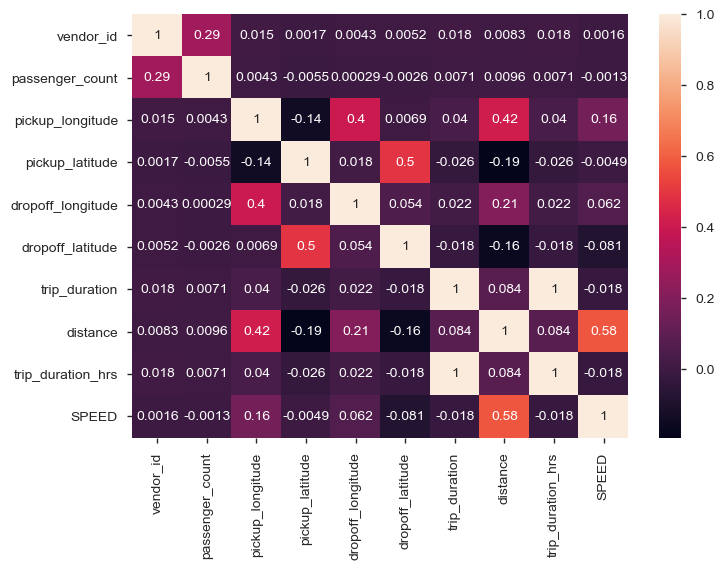

In [299]:
sns.heatmap(corr,annot=True)
plt.show()

From above Heat Map it is observed that there is positive correlation between:
- Trip_duration and Distance
- SPEED and Distance

# Univariate analysis for: 
- passenger_count
- vendor_id
- store_and_fwd_flag

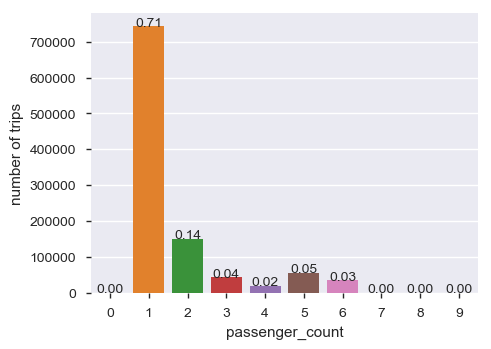

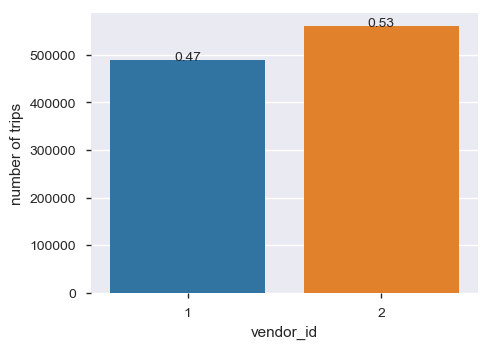

In [300]:
plt.figure(figsize=(5,8))
total = float(len(taxi_mod))
plt.subplot(2,1,1)
ax=sns.countplot(x='passenger_count', data=taxi_mod)
plt.ylabel('number of trips')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    
plt.figure(figsize=(5,8))
plt.subplot(2,1,2)
bx=sns.countplot(x='vendor_id', data=taxi_mod)
plt.ylabel('number of trips')
for p in bx.patches:
    height = p.get_height()
    bx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
    
plt.show()

Observation from countplots of number of passengers 
- Most number of trips are found to be taken by single passenger (greater than 700,000 out of 1,458,644 total trips)
- 71% of the trips were travelled by single passenger
- 14% of the trips were travelled by two passenger
- 4% of the trips were travelled by three passenger
- 11% of the trips were travelled by four and more passenger

Observation from countplots of vendor_id 1 and 2
- 53% of the trips are served by vendor 2 and 47% by vendor 1
- Hence highest marketshare is owned by Vendor 2

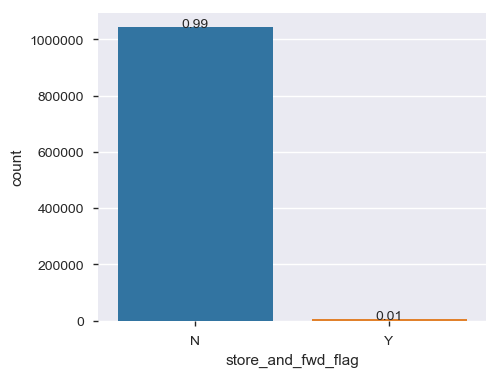

In [301]:
plt.figure(figsize=(5,4))
dx=sns.countplot(x='store_and_fwd_flag', data=taxi_mod)
for p in dx.patches:
    height = p.get_height()
    dx.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.show()


Above countplot shows that:
- 99% of the trips records were not stored in the vehicle
- 1% of the trips records were stored in the vehicle due to lack of connection to server at the time of trip

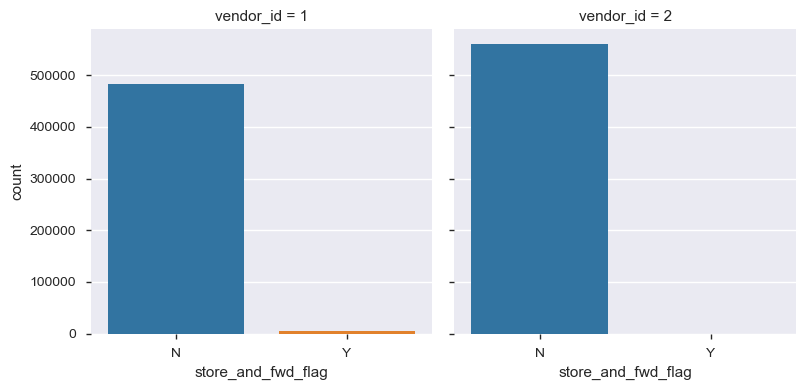

In [302]:
plt.figure(figsize=(10,5))
cx=sns.factorplot(x='store_and_fwd_flag', col='vendor_id', kind='count', data=taxi_mod);
plt.show()

From above factorplot it is observed that:
- Vendor 1 had the BETTER infrastructure for the offline storage of trip records
OR
- Vendor 1 has POOR connectivity with server

AND 

- Vendor 2 had the POOR infrastructure for the offline storage of trip records
OR
- Vendor 2 has BETTER connectivity with server

# Univariate analysis for:
- Hour_of day
- month_of_date
- day_of_week
- day_of month

Adding the features which separates the pickup_datetime stamp into hour_of_day, month_of_date, day_of_week, day_of_month, day_of_week_num


In [303]:
#Adding the features which separates the pickup_datetime stamp into hour_of_day, month_of_date, day_of_week, day_of_month, day_of_week_num

taxi_mod['hour_of_day']=taxi_mod.pickup_datetime.dt.hour
taxi_mod['month_of_date'] = taxi_mod['pickup_datetime'].dt.month
taxi_mod['day_of_week'] = taxi_mod['pickup_datetime'].dt.weekday_name
taxi_mod['day_of_month'] = taxi_mod['pickup_datetime'].dt.day
taxi_mod['day_of_week_num'] = taxi_mod['pickup_datetime'].dt.dayofweek


In [304]:
taxi_mod.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,trip_duration_hrs,SPEED,hour_of_day,month_of_date,day_of_week,day_of_month,day_of_week_num
0,id2875421,2,2016-03-14 17:24:00,14-03-2016 17:32,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.498523,0.126389,11.856446,17,3,Monday,14,0
1,id2377394,1,2016-12-06 00:43:00,12-06-2016 00:54,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.805510,0.184167,9.803675,0,12,Tuesday,6,1
2,id3858529,2,2016-01-19 11:35:00,19-01-2016 12:10,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385107,0.590000,10.822216,11,1,Tuesday,19,1
3,id3504673,2,2016-06-04 19:32:00,06-04-2016 19:39,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485501,0.119167,12.465740,19,6,Saturday,4,5
4,id2181028,2,2016-03-26 13:30:00,26-03-2016 13:38,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.188591,0.120833,9.836615,13,3,Saturday,26,5


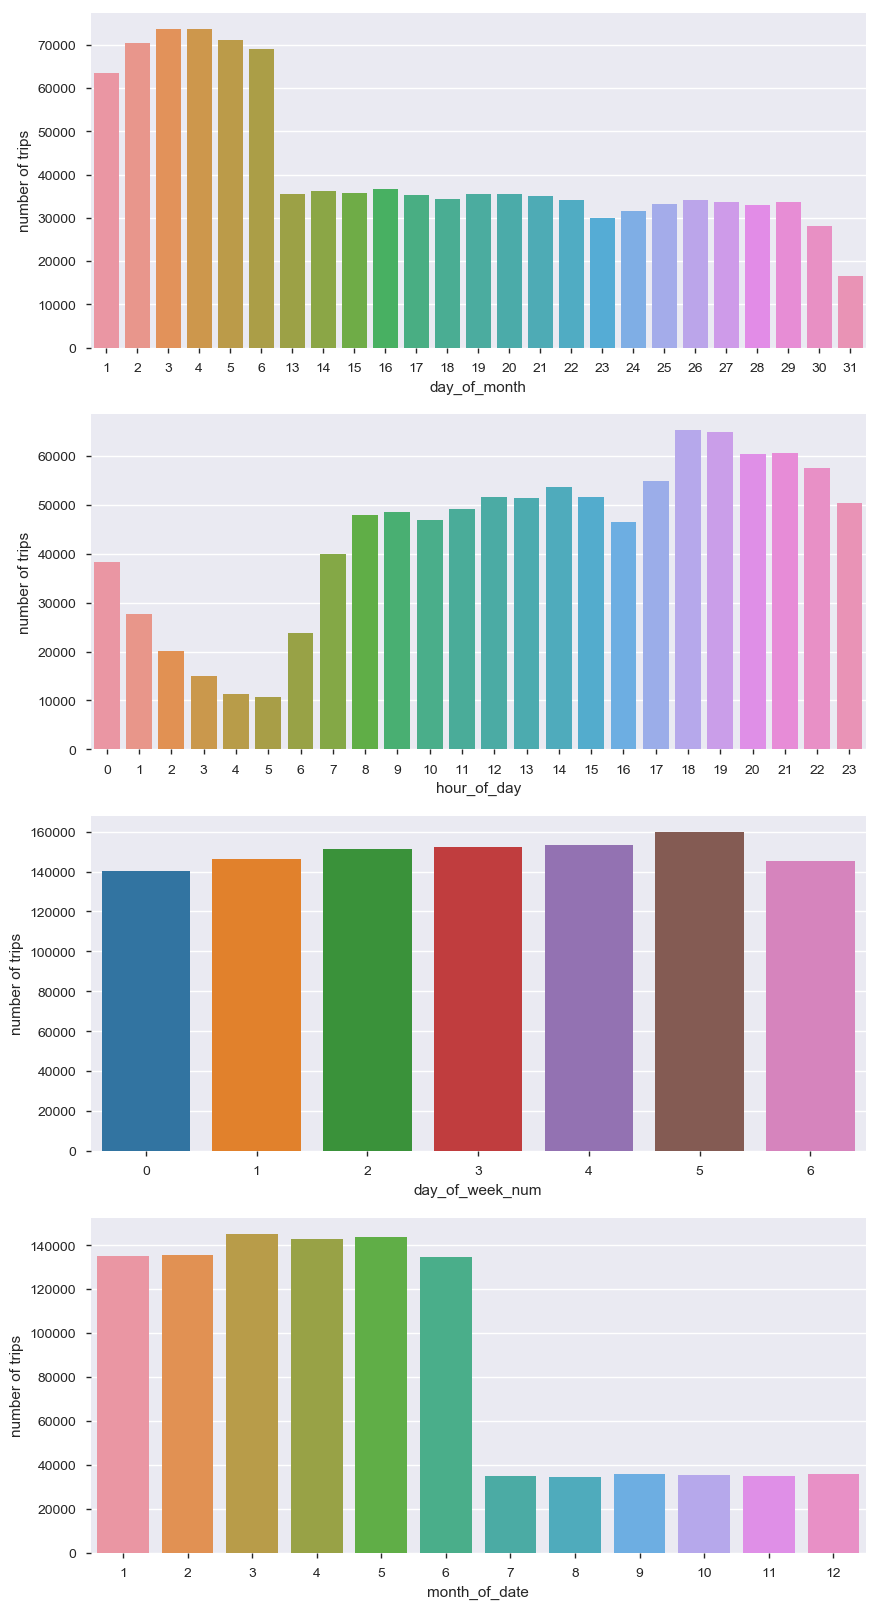

In [305]:
plt.figure(figsize=(10,20))
plt.subplot(4,1,1)
sns.countplot(x='day_of_month', data=taxi_mod)
plt.ylabel('number of trips')
plt.subplot(4,1,2)
sns.countplot(x='hour_of_day', data=taxi_mod)
plt.ylabel('number of trips')
plt.subplot(4,1,3)
sns.countplot(x='day_of_week_num', data=taxi_mod)
plt.ylabel('number of trips')
plt.subplot(4,1,4)
sns.countplot(x='month_of_date', data=taxi_mod)
plt.ylabel('number of trips')
plt.show()

From above shown countplots we can conclude that:
- First 6 days of any given month has highest number of trips
- Between 18:00 and 20:00 local time has the highest number of pick ups
    - We can see there is a raise in the number of trips at the start of Business hours  (i.e, from 6am to 9am) which is in par with everyday experience
    - And a peek in the number of trips can be observed during the end of Business hours (i.e, from 5pm to 8pm)
    - Post 9pm, there is a decrease in  the number of trips till 5am of next day 
- Almost all days in a week has the same number of trips(slightly less on Sundays can be sundays)
- First 6 months of 2016 had the high number of pick-up(i.e from January to June)
- From July to December the count of number of trips are almost the same

In [306]:
taxi_mod1=taxi_mod

Filtering the duration value greater than 1 hour for trip distance less than 1km
- non linear data points
- inconsistent data

REMOVING THE INCONSISTENT DATA FROM THE ORIGINAL DATA (1048574  - 337 = 1048238)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 2 columns):
trip_duration    337 non-null int64
distance         337 non-null float64
dtypes: float64(1), int64(1)
memory usage: 5.3 KB


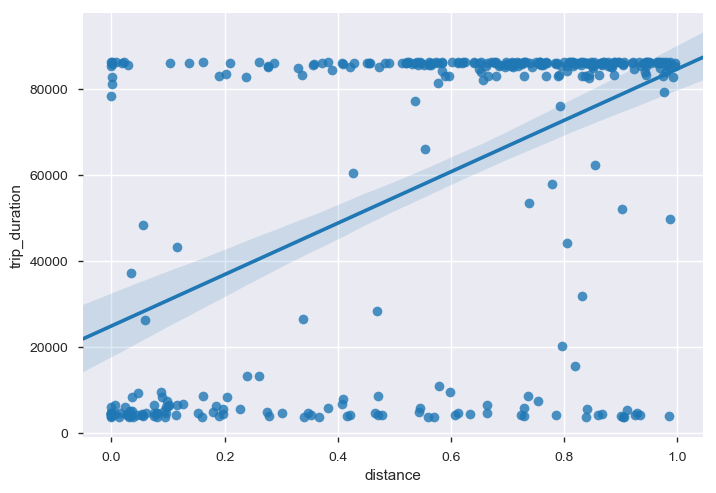

In [307]:
#taxi_mod2=pd.concat([taxi_mod, taxi_mod1]).loc[taxi_mod.index.symmetric_difference(taxi_mod1.index)]
taxi_mod2=taxi_mod1.loc[(taxi_mod1['trip_duration'] >=3600 ) & (taxi_mod1['distance'] <= 1),['trip_duration','distance'] ].reset_index(drop=True)
sns.regplot(taxi_mod2['distance'], taxi_mod2.trip_duration)
taxi_mod2.info()
plt.show()

Observation:
- For the trips which has distance less than 1KM and duration greater than 1Hour are non-linear
- It is practically not possible to travel less than 1 KM for more than 1 Hour
- Hence these 337 rows of inconcitent data is removed from dataset

In [308]:
taxi_mod3=pd.concat([taxi_mod2, taxi_mod1]).loc[taxi_mod1.index.symmetric_difference(taxi_mod2.index)]
taxi_mod3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048238 entries, 337 to 1048574
Data columns (total 19 columns):
SPEED                 1048238 non-null float64
day_of_month          1048238 non-null float64
day_of_week           1048238 non-null object
day_of_week_num       1048238 non-null float64
distance              1048238 non-null float64
dropoff_datetime      1048238 non-null object
dropoff_latitude      1048238 non-null float64
dropoff_longitude     1048238 non-null float64
hour_of_day           1048238 non-null float64
id                    1048238 non-null object
month_of_date         1048238 non-null float64
passenger_count       1048238 non-null float64
pickup_datetime       1048238 non-null datetime64[ns]
pickup_latitude       1048238 non-null float64
pickup_longitude      1048238 non-null float64
store_and_fwd_flag    1048238 non-null object
trip_duration         1048238 non-null int64
trip_duration_hrs     1048238 non-null float64
vendor_id             1048238 non-null

In [309]:
taxi_mod4=taxi_mod3.loc[(taxi_mod3['trip_duration'] <= 18000) & (taxi_mod3['distance'] <= 100),['trip_duration','distance'] ].reset_index(drop=True)

In [310]:
taxi_mod4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046734 entries, 0 to 1046733
Data columns (total 2 columns):
trip_duration    1046734 non-null int64
distance         1046734 non-null float64
dtypes: float64(1), int64(1)
memory usage: 16.0 MB


# Bi-variate Analysis between:

- Distance V/S Trip_duration
- hour_of_day V/S Trip_duration
- month_of_date V/S Trip_duration
- day_of_week_num V/S Trip_duration
- day_of_month V/S Trip_duration
- hour_of_day V/S Distance
- month_of_date V/S Distance
- day_of_week_num V/S Distance
- day_of_month V/S Distance
- hour_of_day V/S SPEED(Km/Hr)
- month_of_date V/S SPEED(Km/Hr)
- day_of_week_num V/S SPEED(Km/Hr)
- day_of_month V/S SPEED(Km/Hr)

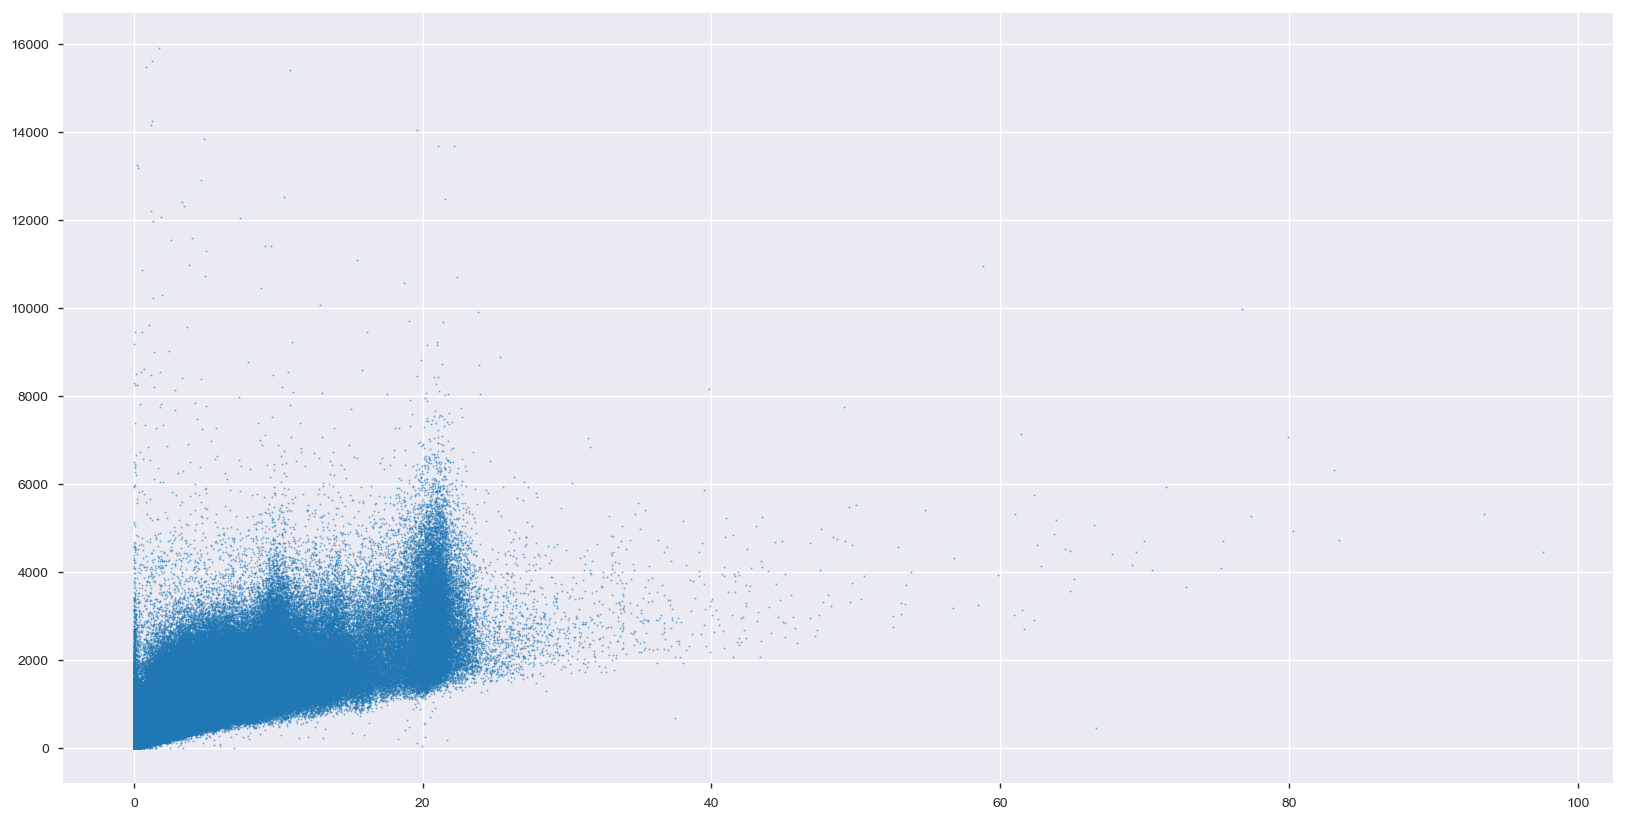

In [311]:
plt.figure(figsize=(20,10))
plt.scatter(taxi_mod4['distance'],taxi_mod4['trip_duration'],s=1, alpha=0.5)
plt.show()

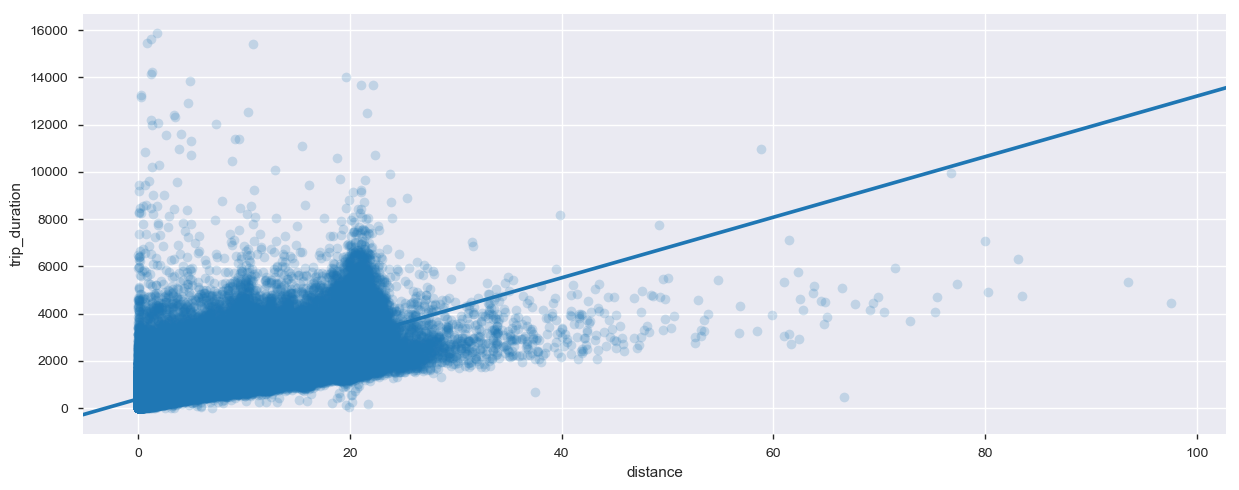

In [312]:
sns.lmplot(x='distance', y='trip_duration', data=taxi_mod4, aspect=2.5, scatter_kws={'alpha':0.2})
plt.show()

Above plot shows that there is a linearity between distance of a trip and the trip druation
- Trip duration increases linearly as the distance increases which is true and is inline with the real life experience
- Hence distance of a trip is an important feature for predicting the duration of a trip

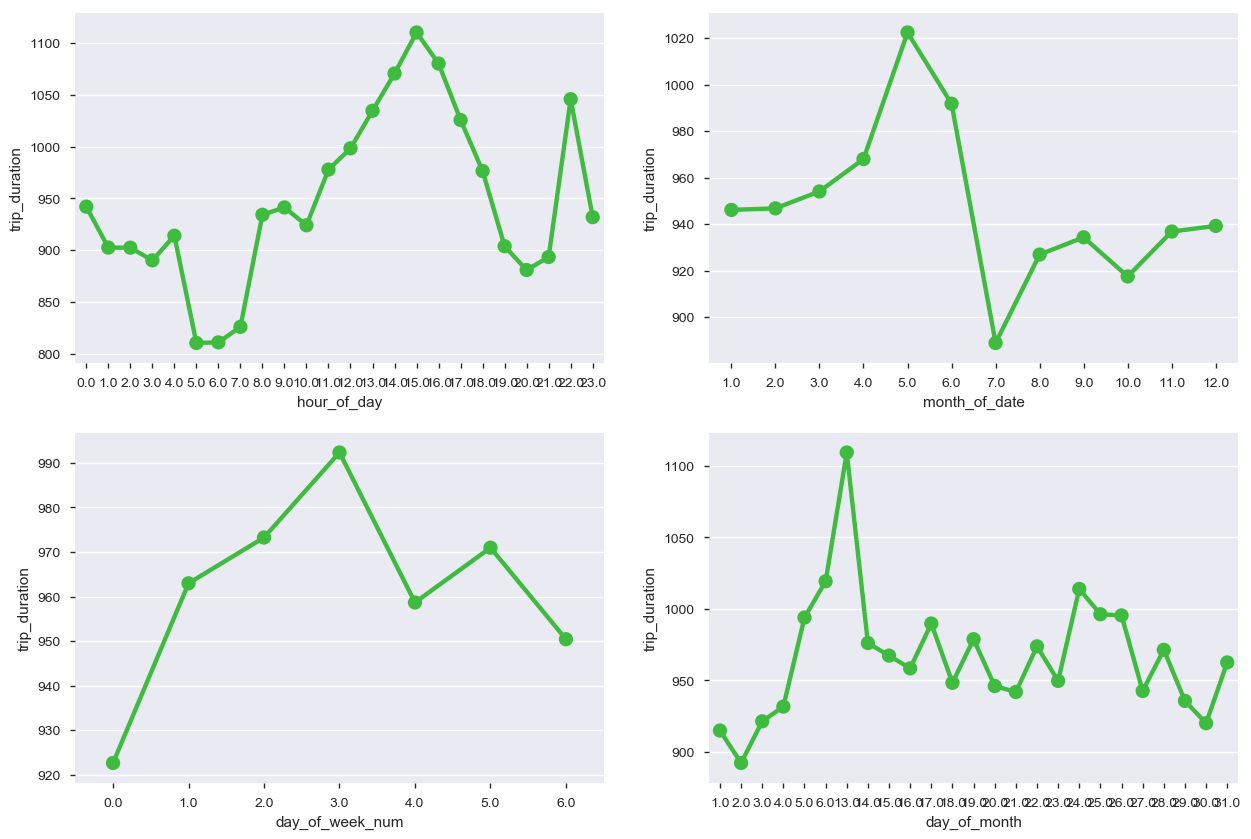

In [313]:
group1 = taxi_mod3.groupby('hour_of_day').trip_duration.mean()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.pointplot(group1.index, group1.values,color="#3fbb3f")
plt.ylabel('trip_duration')

group2 = taxi_mod3.groupby('month_of_date').trip_duration.mean()
plt.subplot(2,2,2)
sns.pointplot(group2.index, group2.values,color="#3fbb3f")
plt.ylabel('trip_duration')


group3 = taxi_mod3.groupby('day_of_week_num').trip_duration.mean()
plt.subplot(2,2,3)
sns.pointplot(group3.index, group3.values,color="#3fbb3f")
plt.ylabel('trip_duration')

group4 = taxi_mod3.groupby('day_of_month').trip_duration.mean()
plt.subplot(2,2,4)
sns.pointplot(group4.index, group4.values,color="#3fbb3f")
plt.ylabel('trip_duration')


plt.show()

Hour of the day VS Trip duration
----------------------------------
- Average duration of trips is observed to be increasing from 8am to 4pm and decreasing post 4pm
- Trip duration is the least between 5am and 7am

Highest variation in Trip duration(800 - 1150 seconds) is found when the average Trip duration is plotted against the time in a day the trip was taken. Hence we can conclude that Duration of a Trip is highly dependant on Trip time of the day which in par with the experience in real life scenario.

Month of the year VS Trip duration
------------------------------------
- Average trip duration is highest in the month of May
- Duration is least in the month of July
- Rest of the month in the yaer had almost the same Trip Duration

Variation in the Trip duration is found when Trip duration is plotted against month of the year which is between 850 seconds and 1025 seconds. Hence Trip duration travelled is fairly dependent on which month the year the trip was taken.

Day of the week VS Trip duration
----------------------------------
- Wednesday is found to have highest trip duration compared with all other days in a week
- Monday has least trip duration
- Remaining days in a week including saturday and sunday has the same Trip duration

Least variation in travelled is found when Trip duration is plotted against day of the week which is between 925 seconds and 990 seconds. Hence we can conclude that distance travelled is less dependent on which day in a week a trip was taken.

Day of the month VS Trip duration
-----------------------------------
- 7th of all months in the year 2016 has the highest Trip duration
- 2nd has least duration
- Rest of the days has trip duration between 925 seconds to 1025 seconds



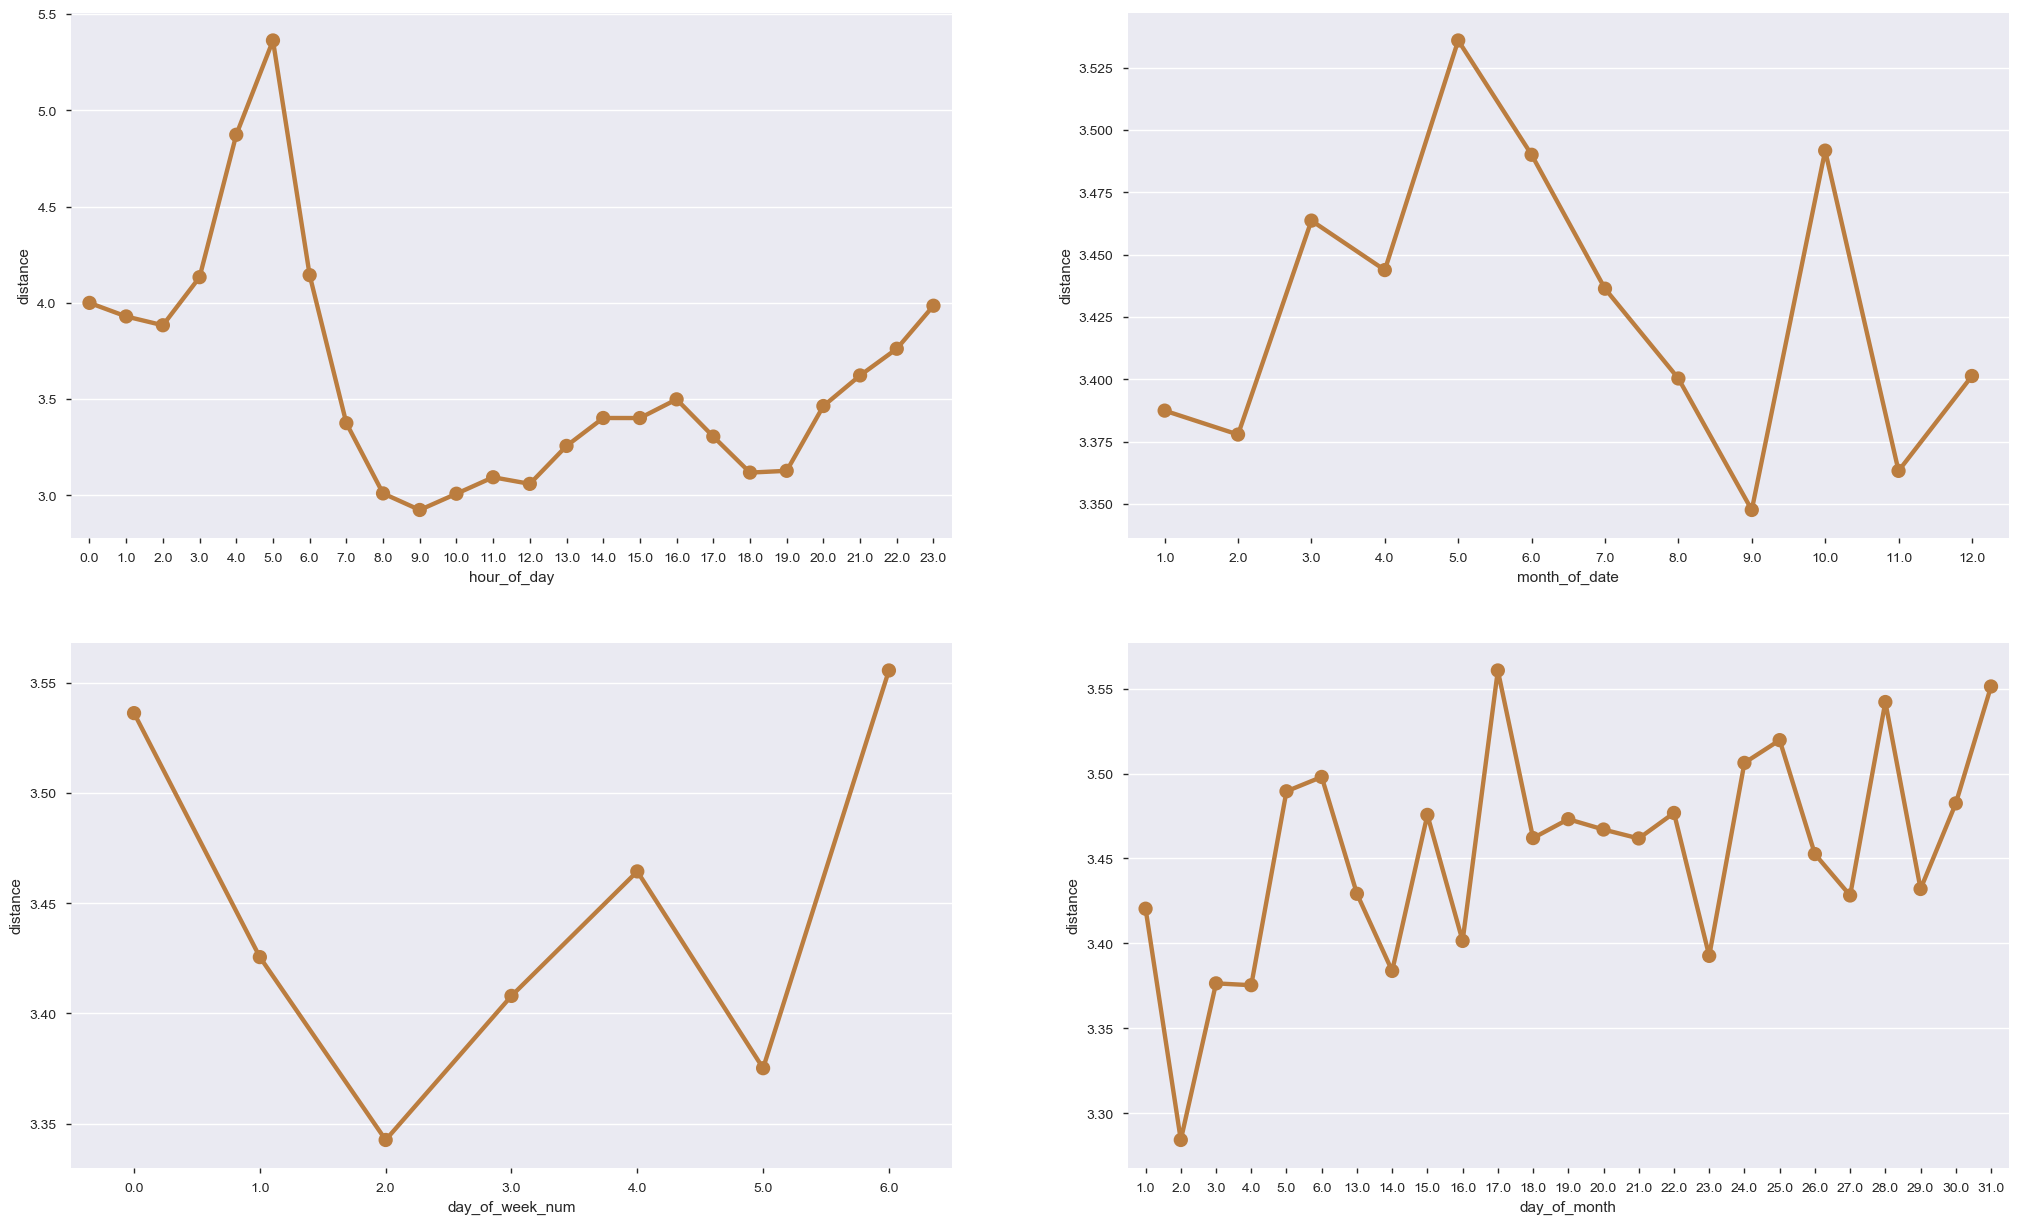

In [314]:
group5 = taxi_mod3.groupby('hour_of_day').distance.mean()
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.pointplot(group5.index, group5.values,color="#bb7d3f")
plt.ylabel('distance')

group6 = taxi_mod3.groupby('month_of_date').distance.mean()
plt.subplot(2,2,2)
sns.pointplot(group6.index, group6.values,color="#bb7d3f")
plt.ylabel('distance')


group7 = taxi_mod3.groupby('day_of_week_num').distance.mean()
plt.subplot(2,2,3)
sns.pointplot(group7.index, group7.values,color="#bb7d3f")
plt.ylabel('distance')

group8 = taxi_mod3.groupby('day_of_month').distance.mean()
plt.subplot(2,2,4)
sns.pointplot(group8.index, group8.values,color="#bb7d3f")
plt.ylabel('distance')
plt.show()


plt.show()

Hour of the day VS Distance Travelled
---------------------------------------
- Average Trip distance traveleld between 5am and 6am is found to be at the peek for nearly 5.5 Kilometer
- Post 6am the distance travelled is decreasing 
- From 7pm onwards the distance travelled is found increasing till 5am 

The Average Distance travelled across all 24 hours in a day is between 3 KM and 5.5 KM, which is significantly higher variation in the distance convered. We can conclude that Distance Travelled is highly dependent on a particular hour in a day in which trip was made.

Month of the year VS Distance Travelled
-----------------------------------------
- Distance travelled in the month of May is highest
- Distance travelled in the month of September is least

As the average distance travelled across all 12 months in the year 2016 is between 3.35 KM and 3.525 KM,which is very less variation, we can conclude that Distance travelled is least dependent on the Month of the Year

Day of the week VS Distance Travelled
---------------------------------------
- On Sunday and Monday(day no 6 and 0) has the highest distance travelled which is close to 3.55 Kilometer
- Distance travelled on Wednesday is least close to 3.35 Kilometer

As the average distance travelled across all 7 days in a week is between 3.35 KM and 3.6 KM,which is very less variation, we can conclude that Distance travelled is least dependent on the day of the week

Day of the month VS Distance Travelled
----------------------------------------
As the average distance travelled across all 31 days in a month is between 3.25 KM and 3.55 KM,which is very less variation, we can conclude that Distance travelled is least dependent on the day of the month

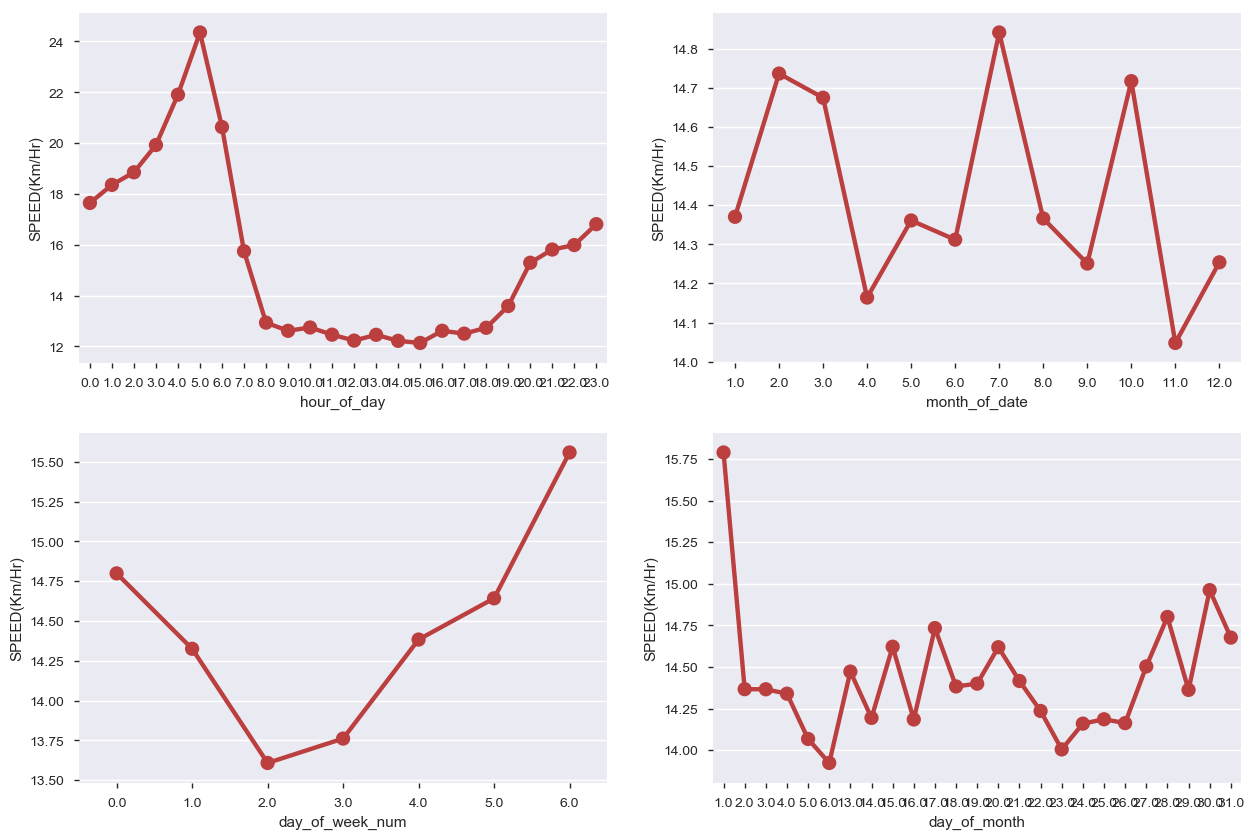

In [315]:
group9 = taxi_mod3.groupby('hour_of_day').SPEED.mean()
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.pointplot(group9.index, group9.values,color="#bb3f3f")
plt.ylabel('SPEED(Km/Hr)')

group10 = taxi_mod3.groupby('month_of_date').SPEED.mean()
plt.subplot(2,2,2)
sns.pointplot(group10.index, group10.values,color="#bb3f3f")
plt.ylabel('SPEED(Km/Hr)')


group11 = taxi_mod3.groupby('day_of_week_num').SPEED.mean()
plt.subplot(2,2,3)
sns.pointplot(group11.index, group11.values,color="#bb3f3f")
plt.ylabel('SPEED(Km/Hr)')

group12 = taxi_mod3.groupby('day_of_month').SPEED.mean()
plt.subplot(2,2,4)
sns.pointplot(group12.index, group12.values,color="#bb3f3f")
plt.ylabel('SPEED(Km/Hr)')
plt.show()


plt.show()

Hour of the day VS SPEED
-------------------------
- During the Business working hours i.e, from 8am to 9pm Speed is almost constant at the lower end which is around 12 Km/Hr. - - - This observation is true and inline with daily experience and lower vehicle speed is observed mostly due to the traffic congestion during these hours of the day.
- Post 9pm speed tends to increase above 13 Km/Hr due to lower traffic till 5 o'clock in the morning.
- Speed of the vehicle is found to be at its peak around 5am to 6am
- Gradual decrease in Speed is observed between 6am and 8 am as it is the onset of business hours
- Large variation in Speed is observed when Speed is plotted agaist Hour of the day which is between(12Km/Hr and 24Km/Hr).Hence the Average speed of a taxi is highly dependent on which time of the day the trip was made

Month of the year VS SPEED
---------------------------
- Average speed is found to be the least in the month of November around 14Km/Hr
- Although not much of variation is observed in the Average speed, we can conclude that the Speed is less dependent on which month of year the trip was made

Day of the week VS SPEED
-------------------------
- Speed is found to be increasing after Friday till Sunday which is agreeable as it is working days of the week
- Post Sunday .i,e from Monday the average Speed starts to decrease and will be between 13.75Km/Hr and 14.75Km/Hr until Friday
- As variation in the speed is fairly higher, we can say that Speed is slightly dependent on the Day of the week

Day of the Month VS SPEED
--------------------------
- Average speed is found to be at the peak only on 1st of every month and remains 14Km/Hr and 14.75 Km/Hr on all other days
- Although the variation the speed is higher, we observe the speed to be between 14Km/Hr and 14.85 on most of the days in a month. Hence we can conclude that Speed is not much dependent on which day og the Month trip was made.

In [316]:
taxi_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
id                    1048575 non-null object
vendor_id             1048575 non-null int64
pickup_datetime       1048575 non-null datetime64[ns]
dropoff_datetime      1048575 non-null object
passenger_count       1048575 non-null int64
pickup_longitude      1048575 non-null float64
pickup_latitude       1048575 non-null float64
dropoff_longitude     1048575 non-null float64
dropoff_latitude      1048575 non-null float64
store_and_fwd_flag    1048575 non-null object
trip_duration         1048575 non-null int64
distance              1048575 non-null float64
trip_duration_hrs     1048575 non-null float64
SPEED                 1048575 non-null float64
hour_of_day           1048575 non-null int64
month_of_date         1048575 non-null int64
day_of_week           1048575 non-null object
day_of_month          1048575 non-null int64
day_of_week_num       1048575 non-null int64
dtype

In [317]:
taxi_mod9 = taxi_mod1.drop(taxi_mod1[(taxi_mod1.distance < 1)&(taxi_mod1.trip_duration > 3600)].index)
taxi_mod9 = taxi_mod1.drop(taxi_mod1[(taxi_mod3['trip_duration'] >= 18000) | (taxi_mod1['distance'] >= 200)].index)

In [318]:
taxi_mod9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047076 entries, 0 to 1048574
Data columns (total 19 columns):
id                    1047076 non-null object
vendor_id             1047076 non-null int64
pickup_datetime       1047076 non-null datetime64[ns]
dropoff_datetime      1047076 non-null object
passenger_count       1047076 non-null int64
pickup_longitude      1047076 non-null float64
pickup_latitude       1047076 non-null float64
dropoff_longitude     1047076 non-null float64
dropoff_latitude      1047076 non-null float64
store_and_fwd_flag    1047076 non-null object
trip_duration         1047076 non-null int64
distance              1047076 non-null float64
trip_duration_hrs     1047076 non-null float64
SPEED                 1047076 non-null float64
hour_of_day           1047076 non-null int64
month_of_date         1047076 non-null int64
day_of_week           1047076 non-null object
day_of_month          1047076 non-null int64
day_of_week_num       1047076 non-null int64
dtype

In [153]:
#taxi_mod9.to_csv('B:/UPX docs/Machine Learning/Project_datasets/Project datasets modified/NYC Taxi Trip/NYC Taxi Trip/Taxi_new.csv')